# Lecture 18 Naive Bayes Classification

## Bayes's theorem

### Conditional probability
http://www.stat.yale.edu/Courses/1997-98/101/condprob.htm
- The conditional probability of an event B is the probability that the event will occur given the knowledge that an event A has already occurred. 

- This probability is written $P(B|A)$, notation for the probability of B given A. In the case where events A and B are independent (where event A has no effect on the probability of event B), the conditional probability of event B given event A is simply the probability of event B, that is P(B).
- If events A and B are not independent, then the probability of the intersection of A and B (the probability that both events occur) is defined by
$$
P(A .and. B) = P(A)P(B|A)
$$
- The conditional probability $P(B|A)$ is easy to calculate:
$$
P(B|A) = \frac{P(A .and. B)}{P(A)}
$$

For example (https://www.mathsisfun.com/data/bayes-theorem.html), assume that you are visiting Yosemite National Park and you might see fires or smokes.

Here are some facts that you know:
- dangerous fires are rare (1%)
- smoke is fairly common (10%) due to barbecues
- 90% of dangerous fires make smoke

$$
P(smoke)P(fires|smoke) = P(fires .and. smoke) = 0.1 * ?
$$
$$
P(fires)P(smoke|fires) = P(fires .and. smoke) = 0.01*0.9
$$

The probability of dangerous Fire when there is Smoke:

$$
P(fires|smoke) = \frac{P(fires)P(smoke|fires)}{P(smoke)} = 0.01*0.9/0.1
$$

### This simple equation is Bayes's theorem!

In machine learning, we are actually interested in identifying the probability of a label L with given features $P(L|features)$. According to Bayes's theorem:
$$
P(L|features)=\frac{P(features|L)P(L)}{P(features)}
$$
If we are trying to decide between two labels—let's call them L1 and L2—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:
$$
\frac{P(L1|features)}{P(L2|features)}=\frac{P(features|L1)P(L1)}{P(features|L2)P(L2)}
$$

All we need now is some model by which we can compute P(features|Li) for each label. Such a model is called a generative model because it specifies the hypothetical random process that generates the data. Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier. The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

### This is where the "naive" in "naive Bayes" comes in: 
if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification. Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

### Classification with Naive Bayes
In the context of classification, we want to find the most probable class label C, given a set of features F1, F2, ..., Fn:

C = argmax P(C | F1, F2, ..., Fn)

Using Bayes' theorem, we can rewrite this expression as:

C = argmax (P(F1, F2, ..., Fn | C) * P(C)) / P(F1, F2, ..., Fn)

Since we are only interested in the class with the highest probability, we can ignore the denominator P(F1, F2, ..., Fn), as it remains constant for all classes:

C = argmax P(F1, F2, ..., Fn | C) * P(C)

Now, we apply the naive assumption that features are conditionally independent given the class:

C = argmax P(F1 | C) * P(F2 | C) * ... * P(Fn | C) * P(C)

This simplification allows us to compute the probability of each class easily, even with a large number of features.

Example:

Suppose we want to classify emails as spam or not spam based on the words they contain. We have a dataset of emails labeled as spam and not spam, and we want to classify a new email with the words "free", "offer", and "discount".

First, we need to calculate the prior probabilities of spam (S) and not spam (NS):

P(S) = (number of spam emails) / (total number of emails)
P(NS) = (number of not spam emails) / (total number of emails)

Next, we calculate the conditional probabilities for each word, given the class:

P("free" | S), P("offer" | S), P("discount" | S)
P("free" | NS), P("offer" | NS), P("discount" | NS)

Now, we apply the Naive Bayesian formula:

P(S | "free", "offer", "discount") ∝ P("free" | S) * P("offer" | S) * P("discount" | S) * P(S)
P(NS | "free", "offer", "discount") ∝ P("free" | NS) * P("offer" | NS) * P("discount" | NS) * P(NS)

Finally, we compare these probabilities and assign the class with the highest probability:

If P(S | "free", "offer", "discount") > P(NS | "free", "offer", "discount"), the email is classified as spam; otherwise, it is classified as not spam.

In summary, Naive Bayesian classification is a powerful and efficient technique for classification tasks, relying on the simplifying assumption of feature independence given the class label. This assumption allows for the easy computation of class probabilities and performs well in many real-world applications





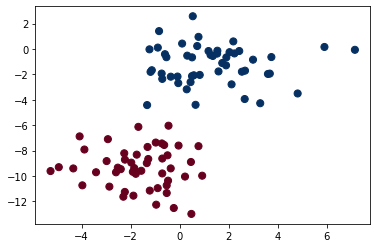

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One extremely naive assumption: the data is described by a Gaussian distribution with no covariance between dimensions. 

This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.

[(-8.0, 8.0), (-15.0, 5.0)]

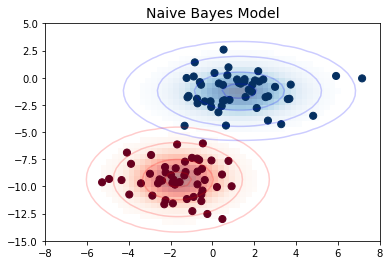

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses. With this generative model in place for each class, we have a simple recipe to compute the likelihood P(features | L1) for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

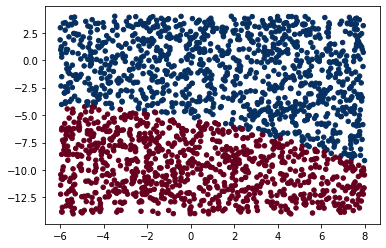

In [8]:
# fit a Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

# generate some test data
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu')

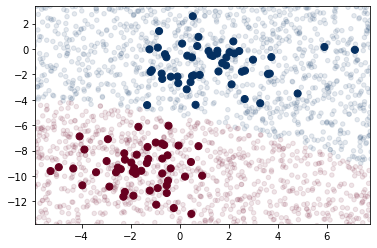

In [9]:
# classify the test data
ynew = model.predict(Xnew)

# plot the predictions
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the predict_proba method:

In [10]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

The columns give the posterior probabilities of the first and second label, respectively. If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

### Bernoulli naive Bayes
If X is random variable Bernoulli-distributed:

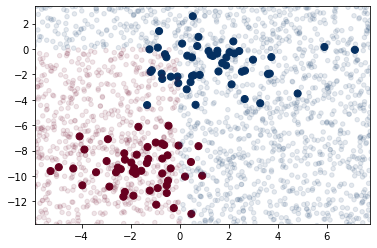

In [11]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X, y);

# classify the test data
ynew = model.predict(Xnew)

# plot the predictions
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

### Multinomial naive Bayes
A multinomial distribution is useful to model feature vectors where each value represents, for example, the number of occurrences of a term or its relative frequency.

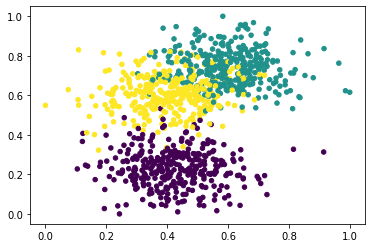

In [55]:
X, y = make_blobs(1000, 2, centers=3, random_state=2, cluster_std=1.5)

from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

plt.scatter(X_minmax[:, 0], X_minmax[:, 1], c=y, s=20)

In [65]:
# 2. instantiate a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_minmax,y)

# generate some test data
rng = np.random.RandomState(0)
Xnew = rng.rand(2000, 2)

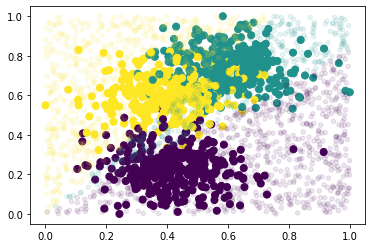

In [66]:
ynew = model.predict(Xnew)

# plot the predictions
plt.scatter(X_minmax[:, 0], X_minmax[:, 1], c=y, s=50)
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, alpha=0.1)
plt.axis(lim);

In [25]:
import pandas as pd
features = ['label', 'message']
sms = pd.read_table("sms.csv",  header=None, names=features)

sms

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [26]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [27]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [40]:
X = sms.message
y = sms.label_num

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Vectorize data
# learn training data vocabulary, then use it to create a document-term matrix
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [43]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_dtm, y_train)

y_pred_class = model.predict(X_test_dtm)
y_pred_class

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9885139985642498

# Homework 8

1. Use the FLX_US-Ho1_FLUXNET2015_SUBSET_DD_1996-2018_beta-3.csv dataset under Lec 17 and KNN to predict LE. Features could be "TA_F", "SW_IN_F", "VPD_F", target variable is "LE_F_MDS". Use the data before 2015 as training data, and the rest for the test data. What K values you will choose to make the best prediction?

2. Classify text documents (such as news articles or emails) into different categories.

Dataset:
For this assignment, you can use the 20 Newsgroups dataset, which contains approximately 20,000 newsgroup documents evenly distributed across 20 different categories. You can load this dataset using scikit-learn's built-in function:

from sklearn.datasets import fetch_20newsgroups

Tasks:

- Load and preprocess the dataset: (1pt)
    - Use the fetch_20newsgroups() function to load the 20 Newsgroups dataset. Load the data for both training and testing using the subset parameter.
    - Remove any headers, footers, and quotes from the text using the remove parameter.
    - Split the dataset into a training set and a testing set.
- Feature extraction: (1pt)
    - Convert the text documents into a matrix of token counts using scikit-learn's CountVectorizer.
    - Transform the count matrix into a normalized representation using TfidfTransformer.
- Train and evaluate the Naive Bayesian classifier: (4pt)
    - Choose a Naive Bayesian classifier from scikit-learn (e.g., MultinomialNB for discrete data or GaussianNB for continuous data).
    - Train the classifier using the training set.
    - Predict the class labels for the testing set.
    - Calculate the accuracy of your classifier by comparing the predicted labels with the true labels of the testing set. You can use the accuracy_score function from scikit-learn.

- Fine-tune your classifier: (2pt)
    - Experiment with different preprocessing techniques, feature extraction methods, or classifier parameters to improve the accuracy of your classifier.